<a href="https://colab.research.google.com/github/Habibu-Ahmad/Modelling_Ribosome_Motion/blob/main/Ballistic/k_some_phase_diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

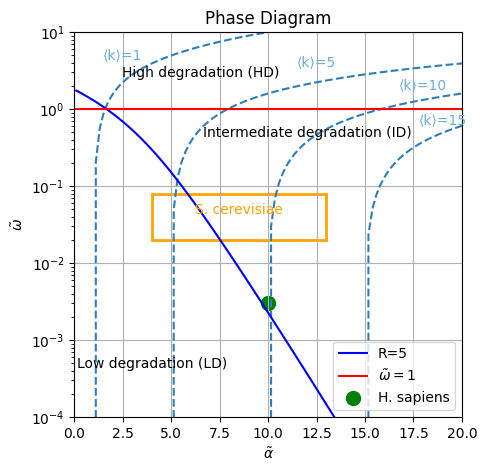

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib.patches import Rectangle

# Define the first equation
def equation1(omega, alpha, k):
    return k - (alpha / omega) * (1 - np.exp(-omega))

# Define the second equation
def equation2(omega, alpha, R):
    return R - (omega * (np.exp(alpha + omega) - 1) / (alpha + omega))

# Define the range for alpha
alpha_values = np.linspace(0.1, 20, 100)

# Define the values of k
k_values = [1, 5, 10, 15]

# Define the value of R
R = 5

# Plot omega vs alpha for each value of k
plt.figure(figsize=(5, 5))
for k in k_values:
    omega_values_1 = []
    for alpha in alpha_values:
        omega_solution_1 = fsolve(equation1, x0=0.1, args=(alpha, k))
        omega_values_1.append(omega_solution_1[0])
    plt.semilogy(alpha_values, omega_values_1, linestyle='--', color=plt.cm.Blues(0.7))

# Plot omega vs alpha for the second equation
omega_values_2 = []
for alpha in alpha_values:
    omega_solution_2 = fsolve(equation2, x0=0.1, args=(alpha, R))
    omega_values_2.append(omega_solution_2[0])
plt.semilogy(alpha_values, omega_values_2, label=f'R={R}', color='blue', linestyle='-')

# Plot horizontal line for omega = 1
plt.axhline(y=1, color='r', linestyle='-', label='$\\tilde{\\omega} = 1$')

# Adding markers at specified points
plt.scatter(10, 0.003, color='green', marker='o', label='H. sapiens', s=100)  # Adjust size with 's' parameter
rectangle = Rectangle((4, 0.02), 13-4, 0.08-0.02, edgecolor='orange', facecolor='none', linestyle='-', linewidth=2)
plt.gca().add_patch(rectangle)  # Add rectangle to current axes
plt.text(8.5, 0.05, 'S. cerevisiae', fontsize=10, ha='center', va='center', color='orange')  # Add label for rectangle

plt.xlabel('$\\tilde{\\alpha}$')
plt.ylabel('$\\tilde{\\omega}$')
plt.title('Phase Diagram')
plt.legend()
plt.ylim(0.0001, 10**1)
plt.xlim(0, 20)
plt.text(6.5, 3, 'High degradation (HD)', fontsize=10, ha='center', va='center')
plt.text(4, 0.0005, 'Low degradation (LD)', fontsize=10, ha='center', va='center')
plt.text(12, 0.5, 'Intermediate degradation (ID)', fontsize=10, ha='center', va='center')
plt.text(2.5, 5, '⟨k⟩=1', fontsize=10, ha='center', va='center', color=plt.cm.Blues(0.5))
plt.text(12.5, 4, '⟨k⟩=5', fontsize=10, ha='center', va='center', color=plt.cm.Blues(0.5))
plt.text(18, 2, '⟨k⟩=10', fontsize=10, ha='center', va='center', color=plt.cm.Blues(0.5))
plt.text(19, 0.7, '⟨k⟩=15', fontsize=10, ha='center', va='center', color=plt.cm.Blues(0.5))

plt.grid(True)
plt.show()
